#### Install requirements, if needed. (Uncomment next cell)

In [47]:
# !pip install -r requirements.txt

In [48]:
import pandas as pd
import seaborn as sns

In [49]:
raw_data_filepath = './raw_data/shopify_raw_data.xlsx'

# Data was downloaded from 
# https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0

In [50]:
# Import into dataframe
data = pd.read_excel(raw_data_filepath)
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 04:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11


In [51]:
# Q.1: Are there any missing entries?
data.isnull().values.any()

False

In [52]:
# Q.2: Are monetary and items dtype numeric?
data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

#### Data is clean to use! 

In [53]:
# Dont need the first column, reindex using order_id
data.set_index('order_id', inplace=True)
data.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at
order_id,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56
2,92,925,90,1,cash,2017-03-03 17:38:52
3,44,861,144,1,cash,2017-03-14 04:23:56
4,18,935,156,1,credit_card,2017-03-26 12:43:37
5,18,883,156,1,credit_card,2017-03-01 04:35:11


##### Now we have a working database. 

### Step 1: Check 'Naive' Average Order Value

It has been reported that the 'Average Order Value (AOV)' is $3145.13. Let us confirm.

In [54]:
round(data.order_amount.mean(),2)

3145.13

In [55]:
round(data.order_amount.median(),2)

284.0

The median value is just 284$ while the average far exceeds (11X) the median. Indicator of outliers in the data.

### Step 2: Statistics

Lets explore the order_amount and total_items columns visually.

<AxesSubplot:xlabel='order_amount'>

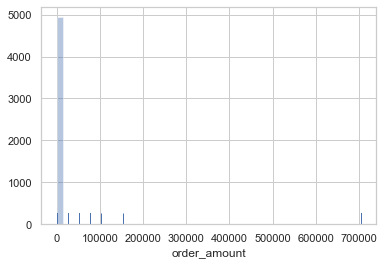

In [56]:
sns.distplot(data.order_amount, kde=False, rug=True)

<AxesSubplot:xlabel='total_items'>

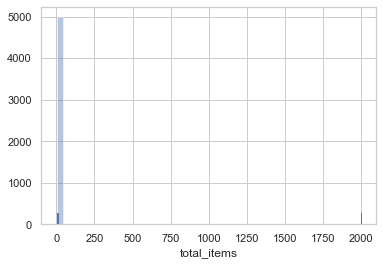

In [57]:
sns.distplot(data.total_items, kde=False, rug=True)

It seems like the order amount for a few orders is very high pushing the average to be 3145$. At the same time, there are orders with more than 1 item per order. 

##### Instead of 'AOV' to evaluate average sneaker price, AOV/item is the metric to be used!

### Step 3: Corrected Average (per Sneaker basis)

In [58]:
data['order_value_per_item'] = data['order_amount']/data['total_items']
data.head()

,shop_id,user_id,order_amount,total_items,payment_method,created_at,order_value_per_item
order_id,,,,,,,
1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
3,44,861,144,1,cash,2017-03-14 04:23:56,144.0
4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0


In [59]:
round(data.order_value_per_item.mean(),2)

387.74

### Thus, the average sneaker value is $387.74